<html>
<head>
    <h2>University of Stirling</h2>
    <h2>Computing Science and Mathematics</h2>
    <h2>MATPMD1 Statistics for Data Science</h2>
    <h1>Chapter 4 Data Distributions</h1>
</head>

<body>
    <h2>4.1 The Normal Distribution</h2>
    <p>The Normal distribution is by far the most important probability distribution in statistics. It is important to understand its nature and role. It is sometimes also called the <strong>Gaussian distribution</strong>, after the mathematician Gauss.
    </p>
</body>

<body>
    <h3>4.1.1 Example Serum Albumin</h3>
    <p>We present the Serum Albumin values in 116 patients with cirrhosis in both Histogram and Frequency Polygon forms. Note that the shape is easier to see using the frequency polygon.
    </p>
</body>

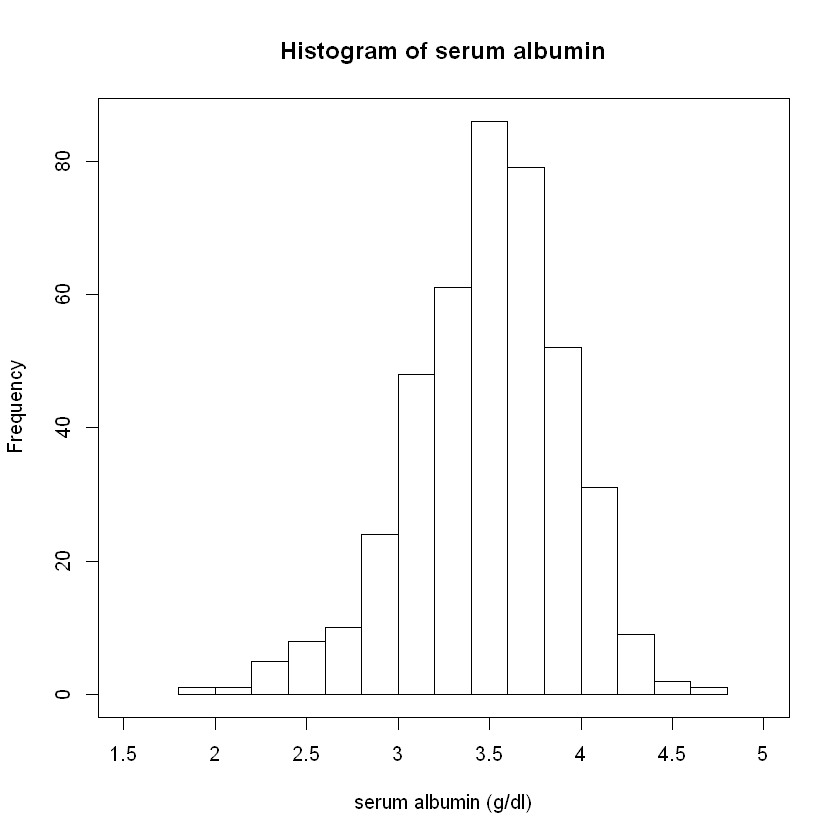

In [1]:
# include the survival library that includes the pbc dataset
library("survival")
# and load the pbc dataset
data(pbc)

# call the hist() function to plot a histogram of the serum albumin data. Note we store the results of this
# call in the bhist variable. We use this to change the tick labels of the plot after.
bhist<-hist(pbc$albumin, main="Histogram of serum albumin",axes=FALSE,xlab="serum albumin (g/dl)",xlim=c(1.5,5))

# change the tick labels on the x and y axes (side=1, and side=2 respectively)
axis(side=1,at=seq(1.5,5,0.5),labels=seq(1.5,5,0.5))
axis(side=2,tick=TRUE)

# and put a box round the plot
box(lty="solid")

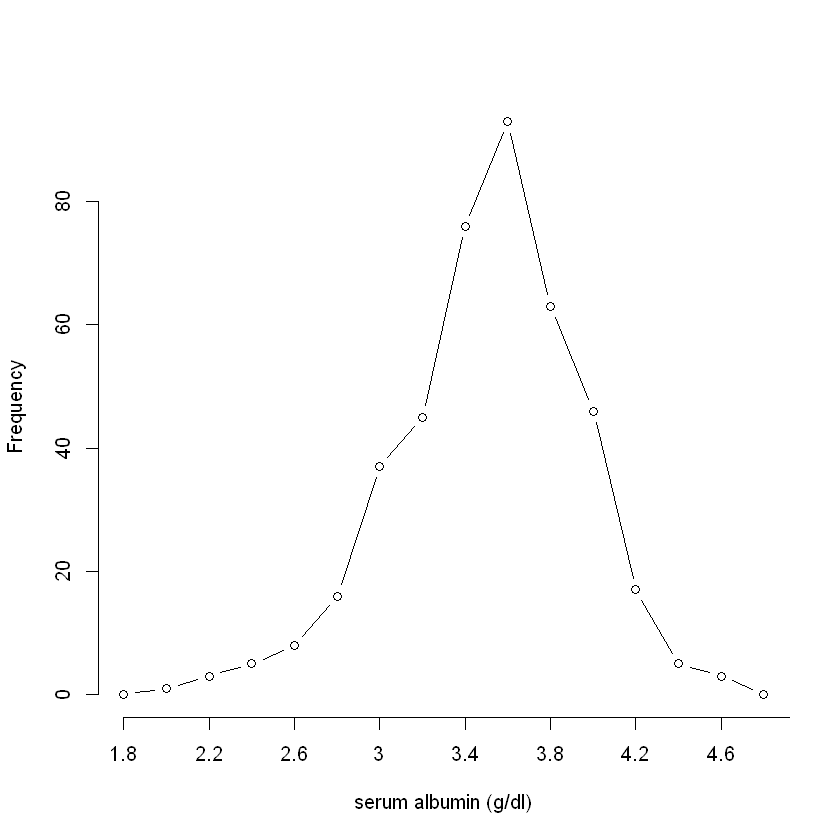

In [2]:
# include the survival library that includes the pbc dataset
library("survival")
# and load the pbc dataset
data(pbc)

# We want to plot a frequency polygon of the albumin data. So, first work out the number of bins we are going
# to have. Note this has hard-coded the lowest and greatest values so that actual values don't fall on a bin
# boundary.
bins<-seq(1.699,4.899,by=0.2)

# use cut() to identify which bin each datavalue falls into
cutdata<-cut(pbc$albumin,bins,right=FALSE)

# we now have to manipulate the data into a form we can plot. First create a table that tallies the number of
# values that fall into each bin
freqdata<-table(cutdata)

# Now can plot the data. Note that we use cbind(freqdata) to manipulate our frequency table into our x and y
# values to plot. NB type="b" tells plot to plot using both lines and points. Note also we use xlab= and ylab=
# to set the labels on the axes. The tick labels are set separately which is why axes=FALSE is given here
plot(cbind(freqdata),type="b",
    xlab="serum albumin (g/dl)",
    ylab="Frequency",
    axes=FALSE)

# And set the ticks for the x and y axes respectively. Note for the y-axis this is a case of just switching back
# on.
axis(1,at=seq(1,18,2),labels=seq(1.8,5.0,0.4))
axis(2,tick=TRUE)

<body>
    <p>Frequency distributions for continuous measurements such as the serum albumin data above often have a single peak, called unimodal. 
    </p>
    <p>They may be symmetric, as in serum albumin above, or asymmetric.
    </p>
<body>

</body>
    <p>As an exercise try plotting the other data cells in the pbc dataset to discover any data values gathered that exhibit asymmetric distributions.
    </p>
</body>

<body>
    <p>The Normal distribution is a probability distribution which is unimodal and symmetric.
    </p>
</body>

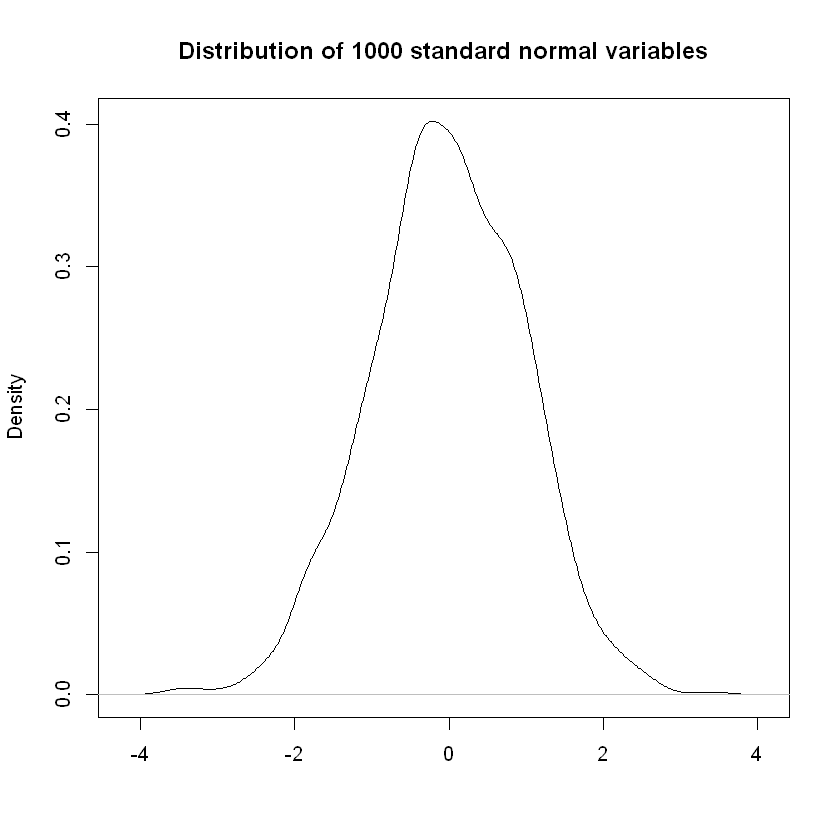

In [3]:
# we want to plot the distribution of 1000 randomly generated standard normal variables. Here the function
# rnorm() generates normal random variables (we ask for 1000, and give mean 0, standard deviation 1 to get
# standard normal random variables)
# density() generates the distribution of the data that we can plot using the plot() command. Note that the
# parameter main= to the plot() function changes the title of the plot.
plot(density(rnorm(n=1000,mean=0,sd=1)),xlab="",main="Distribution of 1000 standard normal variables")

<body>
    <h2>4.2 Using the Normal Distribution</h2>
    <p>The mathematical equation of the Normal distribution is rather complicated but you will be glad to hear that there is no need to know it in order to use the Normal distribution. All the necessary information is available via tables.
    </p>
</body>

<body>
    <p>It is necessary to know that the Normal distribution is completely described by two parameters, the mean and the standard deviation. These are usually denoted as follows:
    </p>
    <table>
        <thead>
            <tr class="header">
                <th style="text-align: left;">Parameter</th>
                <th style="text-align: left;">Symbol</th>
            </tr>
        </thead>
        <tbody>
            <tr class="odd">
                <td style="text-align: left;">mean</td>
                <td style="text-align: left;">$\mu$ (mu)</td>
            </tr>
            <tr class="even">
                <td style="text-align: left;">standard deviation</td>
                <td style="text-align: left;">$\sigma$ (sigma)</td>
            </tr>
        </tbody>
    </table>
    <p>The Normal distribution is related to the mean and standard deviation as illustrated here:
    </p>
</body>

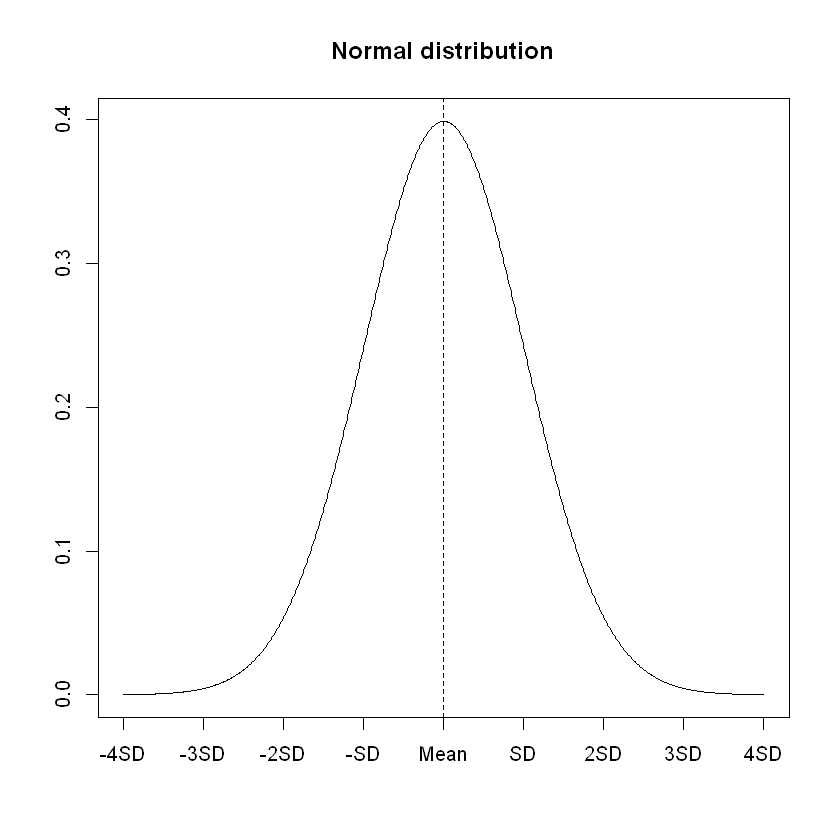

In [4]:
# We want to plot the standard normal distribution between minus and plus four standard deviations
# xnorm holds our x values which we will plot the densities over.
xnorm<-seq(-4,4,0.01)

# we plot the standard normal distribuion by giving our x values as xnorm, then y values as the result
# of the function call dnorm() for each xnorm value. dnorm() returns the density value for each xnorm value and
# we specify mean 0, sd 1 for the standard normal distribution.
# Note in the plot() command we suppress the tick values with axes=FALSE so we can set them later. The parameter
# type="l" tells plot() to plot a line graph.
plot(xnorm,dnorm(xnorm,mean=0,sd=1),xlab="",ylab="",type="l",axes=FALSE,main="Normal distribution")

# Now set the tick labels
xtick = seq(-4,4,1)
axis(1,at=xtick,labels=c("-4SD","-3SD","-2SD","-SD","Mean","SD","2SD","3SD","4SD"))
axis(2,tick=TRUE)

#plot dashed vertical line at the mean
abline(v=0,lty=2)
# and put a box round the plot 
box(lty="solid")

<body>
    <p>Now let us consider the serum albumin data again. The following shows the histogram of the data and superimposed is the Normal distribution with the same mean and variance.
    </p>
    <p>Note that they are very similar. In practice, we are often faced with deciding with whether data are 'Normally distributed'.
    </p>
</body>

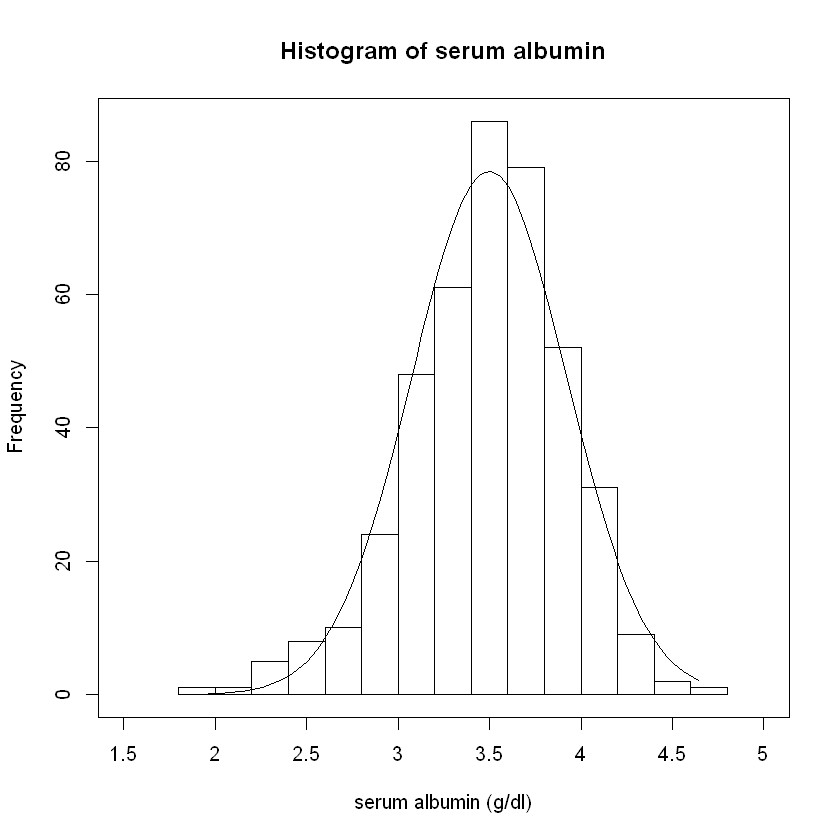

In [5]:
# load the survival library that contains the serum albumin data that we want to plot
library("survival")
# load the pbc data
data(pbc)

# plot the histogram of the albumin data from the pbc dataset
bhist<-hist(pbc$albumin, main="Histogram of serum albumin",axes=FALSE,xlab="serum albumin (g/dl)",xlim=c(1.5,5))

# we now want to overlay this histogram with a line graph of a normal distribution with mean and sd that of the
# albumin data. Note that we have to translate our densities to frequency counts to match our histogram
# first set up 
xnorm <- seq(min(pbc$albumin), max(pbc$albumin), length = 100)
ynorm <- dnorm(xnorm, mean = mean(pbc$albumin), sd = sd(pbc$albumin))
# and translate our density into frequency count
ynorm <- ynorm * diff(bhist$breaks[1:2]) * length(pbc$albumin)

# lines() overlays our original histogram with the line graph
lines(xnorm, ynorm, col = "black")
# and set the tick labels
axis(side=1,at=seq(1.5,5,0.5),labels=seq(1.5,5,0.5))
axis(side=2,tick=TRUE)

# finally put a box round our plot to make it look prettier
box(lty="solid")

<body>
    <p>Note that if data follow a Normal Distribution then it can be shown that the probability of being within a multiple of standard deviations of the mean is:
    </p>
    <table>
    <thead>
        <tr class="header">
        <th>Range</th>
        <th>P(within range)</th>
        <th>P(outside range)</th>
        </tr>
    </thead>
    <tbody>
        <tr class="odd">
        <td>mean $\pm$ 1 SD</td>
        <td>0.683</td>
        <td>0.317</td>
        </tr>
        <tr class="even">
        <td>mean $\pm$ 2 SD</td>
        <td>0.954</td>
        <td>0.046</td>
        </tr>
        <tr class="odd">
        <td>mean $\pm$ 3 SD</td>
        <td>0.9973</td>
        <td>0.0027</td>
        </tr>
    </tbody>
    </table>
</body>

<body>
    <p>Note that the probability of not being within the stated range is 1 minus the probability of being within the range. We see that there is a minimal chance, 0.0027 or 0.27% or about 1 in 400, that a value from a Normal distribution will be more than three standard deviations above or below the mean.
    </p>
</body>

<body>
    <p>The probability of being within two standard deviations of the mean is just over 0.95. In other words, about 95% of observations from a Normal distribution will be within the range (mean - 2SD) to (mean +2SD).
    </p>
    <p>As we will see later, exactly 95% of the area under the Normal distribution curve actually falls within the slightly narrower range of mean $\pm$ 1.96 SD.
    </p>
</body>

<body>
    <p>We noted previously that many statistical methods incorporate important assumptions about the distribution of data. (These methods are called <strong>parametric</strong> methods).
    </p>
    <p>In most cases the distribution involved is the Normal distribution which is one of the reasons why it is the most important distribution in statistics.
    </p>
</body>

<body>
    <p>Although many measurements do have a reasonably Normal distribution, such as human height, many do not, such as human weight or serum cholesterol. There are various ways in which data may deviate from Normality, notably by being asymmetric or skewed.
    </p>
    <p><strong>It should not be assumed that a set of observations is approximately Normal - this must be established.</strong>
    </p>
</body>

<body>
    <h2>4.3 Properties of Samples</h2>
    <p>The distribution of sample statistics (e.g. sample means) is less dispersed than the population parameter and the dispersion decreases with the increase in sample size.
    </p>
    <p>In other words the SD of the sample statistic distribution decreases as $n$ increases because of the offsetting of large and small items in the sample mean.
    </p>
</body>

<body>
    <p>It can be shown that:
    </p>
    $$\begin{equation}\mathrm{SD~of~the~distribution~of~sample~means}\quad = \frac{\sigma}{\sqrt{n}} = \quad\mathrm{SE}_\bar{x} \label{41} \tag{4.1} 
    \end{equation}$$
    <ul class="nobull">
        <li>where $\sigma$ is the population SD and $n$ is the sample size.
        </li>
    </ul>
    <p>SE$_\bar{x}$ is the Standard Error of the Mean, SEM.
    </p>
</body>

<body>
    <ol>
         <li>The <strong>size</strong> of the sample is important (not the number of samples).</li>
    </ol>
</body>

<body>
    <ol start="2">
         <li>The basic idea of sampling is to avoid working with the full population. Therefore we will not know the standard deviation of population but we want to estimate it. Best estimate is $\sigma = s$ where $s$ is the sample standard deviation:<br>
            $$\begin{equation}s=\sqrt{\frac{\sum{(x-\bar{x})^2}}{n-1}} \label{42} \tag{4.2} 
            \end{equation}$$
         </li>
    </ol>
</body>

<body>
    <ol start="3">
        <li>Note that the SEM is <strong>not</strong> the population SD <strong>nor</strong> the sample SD.</li>
    </ol>
</body>

<body> 
    <p>The mean of the distribution of sample means will be the population parameter mean.
    </p>
    <p>As the sample size gets large enough ($\geq$ 30 for most distributions/situations) the sampling distribution of the mean can be approximated by the normal distribution even if the original population is not normal.
    </p>
    <p>(See the Central Limit Theorem)
    </p>
</body>

<body>
    <p>Let us illustrate this concept with first a population which is normally distributed, $\mathcal{N}(100,10^2)$.
    </p>
    <p>Below we show the distribution for the Population, and then for the distribution of then mean of 50 samples where the sample size is 10, 20, 50, 100 and 200.
    </p>
</body>

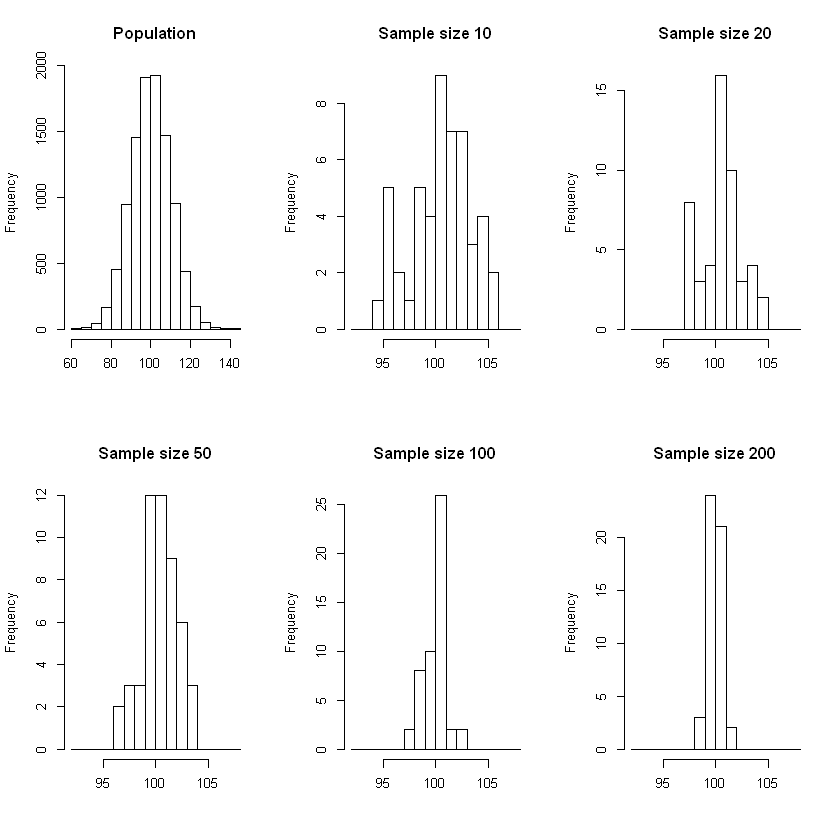

In [6]:
# We are going to plot a histogram of the mean of 50 samples taken from a normal distribution with mean 100, 
# sd 10 for a range of sample sizes: 10,20,50,100,200
nrSamples<-50
popMean<-100
popSD<-10

# first generate 50 samples for each of our sample sizes. To do this call rnorm() with the sample size to
# randomly generate that many numbers from a normal distribution with mean 100, sd 10. Then call replicate() to
# do this 50 times to generate the 50 samples. We do this for each sample size.
sample10<-replicate(nrSamples,rnorm(10,mean=popMean,sd=popSD),simplify=FALSE)
sample20<-replicate(nrSamples,rnorm(20,mean=popMean,sd=popSD),simplify=FALSE)
sample50<-replicate(nrSamples,rnorm(50,mean=popMean,sd=popSD),simplify=FALSE)
sample100<-replicate(nrSamples,rnorm(100,mean=popMean,sd=popSD),simplify=FALSE)
sample200<-replicate(nrSamples,rnorm(200,mean=popMean,sd=popSD),simplify=FALSE)

# this par() command sets our plot window up to have two rows and three columns
par(mfrow=c(2,3))

# first plot a histogram of a 10000 randomly generated random variables from a normal distribution with mean 100,
# sd 10. Note the breaks parameter is controlling the number of bins to use.
hist(rnorm(10000,mean=popMean,sd=popSD),main="Population",xlab="",breaks=14)

# now for each of our sample sizes plot the histogram of the means of the samples
hist(sapply(sample10,mean),main="Sample size 10",xlab="",breaks=c(92:108))
hist(sapply(sample20,mean),main="Sample size 20",xlab="",breaks=c(92:108))
hist(sapply(sample50,mean),main="Sample size 50",xlab="",breaks=c(92:108))
hist(sapply(sample100,mean),main="Sample size 100",xlab="",breaks=c(92:108))
hist(sapply(sample200,mean),main="Sample size 200",xlab="",breaks=c(92:108))

<body>
    <p>Finally Let us illustrate samples from a population which is $\mathrm{lognormal}(0,1)$, a distribution that is positively skewed.
    </p>
    <p>Again we show the distribution for the Population, and then for the distribution of then mean of 50 samples where the sample size is 10, 20, 50, 100 and 200.
    </p>
</body>

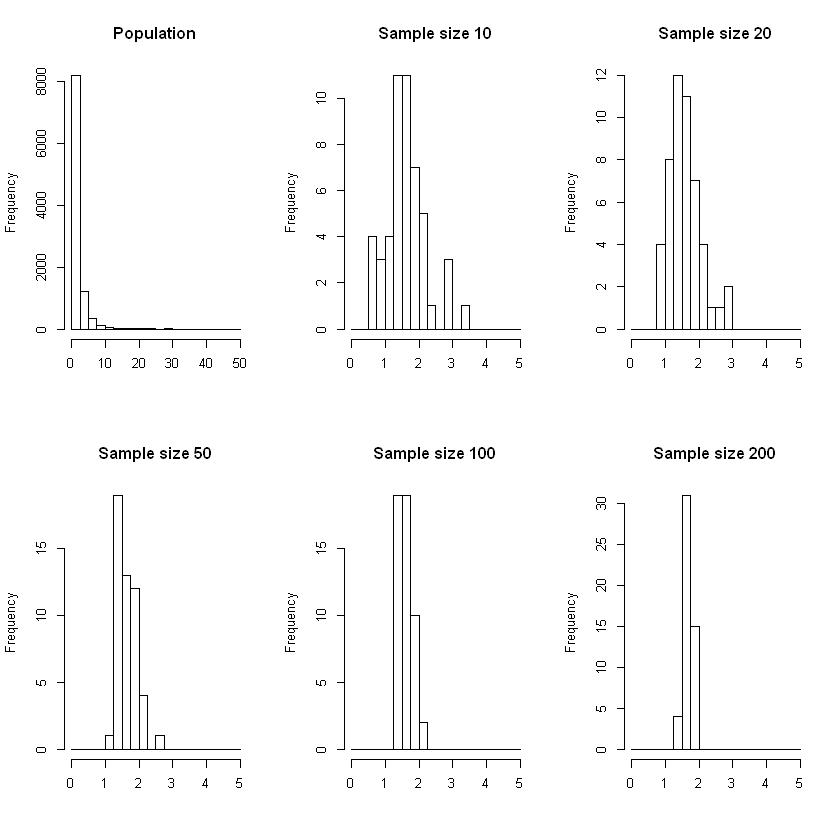

In [7]:
# We are going to plot a histogram of the mean of 50 samples taken from a lognormal(0,1) distribution for a 
# range of sample sizes: 10,20,50,100,200
nrSamples<-50
popMean<-0
popSD<-1

# first generate 50 samples for each of our sample sizes. To do this call rlnorm() with the sample size to
# randomly generate that many numbers from a lognormal(0,1) distribution. Then call replicate() to
# do this 50 times to generate the 50 samples. We do this for each sample size.
sample10<-replicate(nrSamples,rlnorm(10,meanlog=popMean,sdlog=popSD),simplify=FALSE)
sample20<-replicate(nrSamples,rlnorm(20,meanlog=popMean,sdlog=popSD),simplify=FALSE)
sample50<-replicate(nrSamples,rlnorm(50,meanlog=popMean,sdlog=popSD),simplify=FALSE)
sample100<-replicate(nrSamples,rlnorm(100,meanlog=popMean,sdlog=popSD),simplify=FALSE)
sample200<-replicate(nrSamples,rlnorm(200,meanlog=popMean,sdlog=popSD),simplify=FALSE)

# this par() command sets our plot window up to have two rows and three columns
par(mfrow=c(2,3))

# first plot a histogram of a 10000 randomly generated random variables from a normal distribution with mean 100,
# sd 10. Note the breaks parameter is controlling the number of bins to use.
hist(rlnorm(10000,meanlog=popMean,sdlog=popSD),main="Population",xlab="",breaks=seq(0,50,2.5))

# now for each of our sample sizes plot the histogram of the means of the samples
hist(sapply(sample10,mean),main="Sample size 10",xlab="",breaks=seq(0,5,0.25))
hist(sapply(sample20,mean),main="Sample size 20",xlab="",breaks=seq(0,5,0.25))
hist(sapply(sample50,mean),main="Sample size 50",xlab="",breaks=seq(0,5,0.25))
hist(sapply(sample100,mean),main="Sample size 100",xlab="",breaks=seq(0,5,0.25))
hist(sapply(sample200,mean),main="Sample size 200",xlab="",breaks=seq(0,5,0.25))


<body>
    <h2>4.4 Standard Normal Distribution Table
    </h2>
    <p>Here, the table entry for $z$ is the probability of lying above $z$ ie. $P(Z>z)$.
    <table>
    <tbody>
        <tr class="even">
        <td>z</td>
        <td>0.00</td>
        <td>0.01</td>
        <td>0.02</td>
        <td>0.03</td>
        <td>0.04</td>
        <td>0.05</td>
        <td>0.06</td>
        <td>0.07</td>
        <td>0.08</td>
        <td>0.09</td>
        </tr>
        <tr class="odd">
        <td>0.0</td>
        <td>0.5000</td>
        <td>0.4960</td>
        <td>0.4920</td>
        <td>0.4880</td>
        <td>0.4840</td>
        <td>0.4801</td>
        <td>0.4761</td>
        <td>0.4721</td>
        <td>0.4681</td>
        <td>0.4641</td>
        </tr>
        <tr class="even">
        <td>0.1</td>
        <td>0.4602</td>
        <td>0.4562</td>
        <td>0.4522</td>
        <td>0.4483</td>
        <td>0.4443</td>
        <td>0.4404</td>
        <td>0.4364</td>
        <td>0.4325</td>
        <td>0.4286</td>
        <td>0.4247</td>
        </tr>
        <tr class="odd">
        <td>0.2</td>
        <td>0.4207</td>
        <td>0.4168</td>
        <td>0.4129</td>
        <td>0.4090</td>
        <td>0.4052</td>
        <td>0.4013</td>
        <td>0.3974</td>
        <td>0.3936</td>
        <td>0.3897</td>
        <td>0.3859</td>
        </tr>
        <tr class="even">
        <td>0.3</td>
        <td>0.3821</td>
        <td>0.3783</td>
        <td>0.3745</td>
        <td>0.3707</td>
        <td>0.3669</td>
        <td>0.3632</td>
        <td>0.3594</td>
        <td>0.3557</td>
        <td>0.3520</td>
        <td>0.3483</td>
        </tr>
        <tr class="odd">
        <td>0.4</td>
        <td>0.3446</td>
        <td>0.3409</td>
        <td>0.3372</td>
        <td>0.3336</td>
        <td>0.3300</td>
        <td>0.3264</td>
        <td>0.3228</td>
        <td>0.3192</td>
        <td>0.3156</td>
        <td>0.3121</td>
        </tr>
        <tr class="even">
        <td>0.5</td>
        <td>0.3085</td>
        <td>0.3050</td>
        <td>0.3015</td>
        <td>0.2981</td>
        <td>0.2946</td>
        <td>0.2912</td>
        <td>0.2877</td>
        <td>0.2843</td>
        <td>0.2810</td>
        <td>0.2776</td>
        </tr>
        <tr class="odd">
        <td>0.6</td>
        <td>0.2743</td>
        <td>0.2709</td>
        <td>0.2676</td>
        <td>0.2643</td>
        <td>0.2611</td>
        <td>0.2578</td>
        <td>0.2546</td>
        <td>0.2514</td>
        <td>0.2483</td>
        <td>0.2451</td>
        </tr>
        <tr class="even">
        <td>0.7</td>
        <td>0.2420</td>
        <td>0.2389</td>
        <td>0.2358</td>
        <td>0.2327</td>
        <td>0.2296</td>
        <td>0.2266</td>
        <td>0.2236</td>
        <td>0.2206</td>
        <td>0.2177</td>
        <td>0.2148</td>
        </tr>
        <tr class="odd">
        <td>0.8</td>
        <td>0.2119</td>
        <td>0.2090</td>
        <td>0.2061</td>
        <td>0.2033</td>
        <td>0.2005</td>
        <td>0.1977</td>
        <td>0.1949</td>
        <td>0.1922</td>
        <td>0.1894</td>
        <td>0.1867</td>
        </tr>
        <tr class="even">
        <td>0.9</td>
        <td>0.1841</td>
        <td>0.1814</td>
        <td>0.1788</td>
        <td>0.1762</td>
        <td>0.1736</td>
        <td>0.1711</td>
        <td>0.1685</td>
        <td>0.1660</td>
        <td>0.1635</td>
        <td>0.1611</td>
        </tr>
        <tr class="odd">
        <td>1.0</td>
        <td>0.1587</td>
        <td>0.1562</td>
        <td>0.1539</td>
        <td>0.1515</td>
        <td>0.1492</td>
        <td>0.1469</td>
        <td>0.1446</td>
        <td>0.1423</td>
        <td>0.1401</td>
        <td>0.1379</td>
        </tr>
        <tr class="even">
        <td>1.1</td>
        <td>0.1357</td>
        <td>0.1335</td>
        <td>0.1314</td>
        <td>0.1292</td>
        <td>0.1271</td>
        <td>0.1251</td>
        <td>0.1230</td>
        <td>0.1210</td>
        <td>0.1190</td>
        <td>0.1170</td>
        </tr>
        <tr class="odd">
        <td>1.2</td>
        <td>0.1151</td>
        <td>0.1131</td>
        <td>0.1112</td>
        <td>0.1093</td>
        <td>0.1075</td>
        <td>0.1056</td>
        <td>0.1038</td>
        <td>0.1020</td>
        <td>0.1003</td>
        <td>0.0985</td>
        </tr>
        <tr class="even">
        <td>1.3</td>
        <td>0.0968</td>
        <td>0.0951</td>
        <td>0.0934</td>
        <td>0.0918</td>
        <td>0.0901</td>
        <td>0.0885</td>
        <td>0.0869</td>
        <td>0.0853</td>
        <td>0.0838</td>
        <td>0.0823</td>
        </tr>
        <tr class="odd">
        <td>1.4</td>
        <td>0.0808</td>
        <td>0.0793</td>
        <td>0.0778</td>
        <td>0.0764</td>
        <td>0.0749</td>
        <td>0.0735</td>
        <td>0.0721</td>
        <td>0.0708</td>
        <td>0.0694</td>
        <td>0.0681</td>
        </tr>
        <tr class="even">
        <td>1.5</td>
        <td>0.0668</td>
        <td>0.0655</td>
        <td>0.0643</td>
        <td>0.0630</td>
        <td>0.0618</td>
        <td>0.0606</td>
        <td>0.0594</td>
        <td>0.0582</td>
        <td>0.0571</td>
        <td>0.0559</td>
        </tr>
        <tr class="odd">
        <td>1.6</td>
        <td>0.0548</td>
        <td>0.0537</td>
        <td>0.0526</td>
        <td>0.0516</td>
        <td>0.0505</td>
        <td>0.0495</td>
        <td>0.0485</td>
        <td>0.0475</td>
        <td>0.0465</td>
        <td>0.0455</td>
        </tr>
        <tr class="even">
        <td>1.7</td>
        <td>0.0446</td>
        <td>0.0436</td>
        <td>0.0427</td>
        <td>0.0418</td>
        <td>0.0409</td>
        <td>0.0401</td>
        <td>0.0392</td>
        <td>0.0384</td>
        <td>0.0375</td>
        <td>0.0367</td>
        </tr>
        <tr class="odd">
        <td>1.8</td>
        <td>0.0359</td>
        <td>0.0351</td>
        <td>0.0344</td>
        <td>0.0336</td>
        <td>0.0329</td>
        <td>0.0322</td>
        <td>0.0314</td>
        <td>0.0307</td>
        <td>0.0301</td>
        <td>0.0294</td>
        </tr>
        <tr class="even">
        <td>1.9</td>
        <td>0.0287</td>
        <td>0.0281</td>
        <td>0.0274</td>
        <td>0.0268</td>
        <td>0.0262</td>
        <td>0.0256</td>
        <td>0.0250</td>
        <td>0.0244</td>
        <td>0.0239</td>
        <td>0.0233</td>
        </tr>
        <tr class="odd">
        <td>2.0</td>
        <td>0.0228</td>
        <td>0.0222</td>
        <td>0.0217</td>
        <td>0.0212</td>
        <td>0.0207</td>
        <td>0.0202</td>
        <td>0.0197</td>
        <td>0.0192</td>
        <td>0.0188</td>
        <td>0.0183</td>
        </tr>
        <tr class="even">
        <td>2.1</td>
        <td>0.0179</td>
        <td>0.0174</td>
        <td>0.0170</td>
        <td>0.0166</td>
        <td>0.0162</td>
        <td>0.0158</td>
        <td>0.0154</td>
        <td>0.0150</td>
        <td>0.0146</td>
        <td>0.0143</td>
        </tr>
        <tr class="odd">
        <td>2.2</td>
        <td>0.0139</td>
        <td>0.0136</td>
        <td>0.0132</td>
        <td>0.0129</td>
        <td>0.0125</td>
        <td>0.0122</td>
        <td>0.0119</td>
        <td>0.0116</td>
        <td>0.0113</td>
        <td>0.0110</td>
        </tr>
        <tr class="even">
        <td>2.3</td>
        <td>0.0107</td>
        <td>0.0104</td>
        <td>0.0102</td>
        <td>0.0099</td>
        <td>0.0096</td>
        <td>0.0094</td>
        <td>0.0091</td>
        <td>0.0089</td>
        <td>0.0087</td>
        <td>0.0084</td>
        </tr>
        <tr class="odd">
        <td>2.4</td>
        <td>0.0082</td>
        <td>0.0080</td>
        <td>0.0078</td>
        <td>0.0075</td>
        <td>0.0073</td>
        <td>0.0071</td>
        <td>0.0069</td>
        <td>0.0068</td>
        <td>0.0066</td>
        <td>0.0064</td>
        </tr>
        <tr class="even">
        <td>2.5</td>
        <td>0.0062</td>
        <td>0.0060</td>
        <td>0.0059</td>
        <td>0.0057</td>
        <td>0.0055</td>
        <td>0.0054</td>
        <td>0.0052</td>
        <td>0.0051</td>
        <td>0.0049</td>
        <td>0.0048</td>
        </tr>
        <tr class="odd">
        <td>2.6</td>
        <td>0.0047</td>
        <td>0.0045</td>
        <td>0.0044</td>
        <td>0.0043</td>
        <td>0.0041</td>
        <td>0.0040</td>
        <td>0.0039</td>
        <td>0.0038</td>
        <td>0.0037</td>
        <td>0.0036</td>
        </tr>
        <tr class="even">
        <td>2.7</td>
        <td>0.0035</td>
        <td>0.0034</td>
        <td>0.0033</td>
        <td>0.0032</td>
        <td>0.0031</td>
        <td>0.0030</td>
        <td>0.0029</td>
        <td>0.0028</td>
        <td>0.0027</td>
        <td>0.0026</td>
        </tr>
        <tr class="odd">
        <td>2.8</td>
        <td>0.0026</td>
        <td>0.0025</td>
        <td>0.0024</td>
        <td>0.0023</td>
        <td>0.0023</td>
        <td>0.0022</td>
        <td>0.0021</td>
        <td>0.0021</td>
        <td>0.0020</td>
        <td>0.0019</td>
        </tr>
        <tr class="even">
        <td>2.9</td>
        <td>0.0019</td>
        <td>0.0018</td>
        <td>0.0018</td>
        <td>0.0017</td>
        <td>0.0016</td>
        <td>0.0016</td>
        <td>0.0015</td>
        <td>0.0015</td>
        <td>0.0014</td>
        <td>0.0014</td>
        </tr>
        <tr class="odd">
        <td>3.0</td>
        <td>0.0013</td>
        <td>0.0013</td>
        <td>0.0013</td>
        <td>0.0012</td>
        <td>0.0012</td>
        <td>0.0011</td>
        <td>0.0011</td>
        <td>0.0011</td>
        <td>0.0010</td>
        <td>0.0010</td>
        </tr>
        <tr class="even">
        <td>3.1</td>
        <td>0.0010</td>
        <td>0.0009</td>
        <td>0.0009</td>
        <td>0.0009</td>
        <td>0.0008</td>
        <td>0.0008</td>
        <td>0.0008</td>
        <td>0.0008</td>
        <td>0.0007</td>
        <td>0.0007</td>
        </tr>
        <tr class="odd">
        <td>3.2</td>
        <td>0.0007</td>
        <td>0.0007</td>
        <td>0.0006</td>
        <td>0.0006</td>
        <td>0.0006</td>
        <td>0.0006</td>
        <td>0.0006</td>
        <td>0.0005</td>
        <td>0.0005</td>
        <td>0.0005</td>
        </tr>
        <tr class="even">
        <td>3.3</td>
        <td>0.0005</td>
        <td>0.0005</td>
        <td>0.0005</td>
        <td>0.0004</td>
        <td>0.0004</td>
        <td>0.0004</td>
        <td>0.0004</td>
        <td>0.0004</td>
        <td>0.0004</td>
        <td>0.0003</td>
        </tr>
        <tr class="odd">
        <td>3.4</td>
        <td>0.0003</td>
        <td>0.0003</td>
        <td>0.0003</td>
        <td>0.0003</td>
        <td>0.0003</td>
        <td>0.0003</td>
        <td>0.0003</td>
        <td>0.0003</td>
        <td>0.0003</td>
        <td>0.0002</td>
        </tr>
        <tr class="even">
        <td>3.5</td>
        <td>0.0002</td>
        <td>0.0002</td>
        <td>0.0002</td>
        <td>0.0002</td>
        <td>0.0002</td>
        <td>0.0002</td>
        <td>0.0002</td>
        <td>0.0002</td>
        <td>0.0002</td>
        <td>0.0002</td>
        </tr>
    </tbody>
    </table>
</body>